In [5]:
import numpy as np
import pandas as pd

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.filters.hp_filter import hpfilter


import pandas_datareader.data as web

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

In [2]:
gdp = web.DataReader(name='NA000334Q', data_source='fred', start='1990-01-01')
y = np.log(gdp)

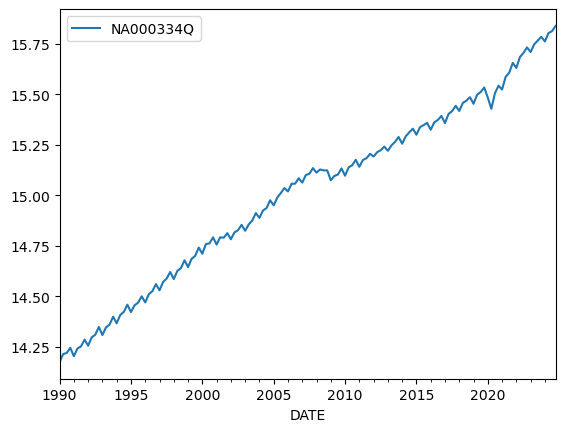

In [3]:
y.plot()
plt.show()

In [6]:
cycle, trend = hpfilter(y, lamb=1600)

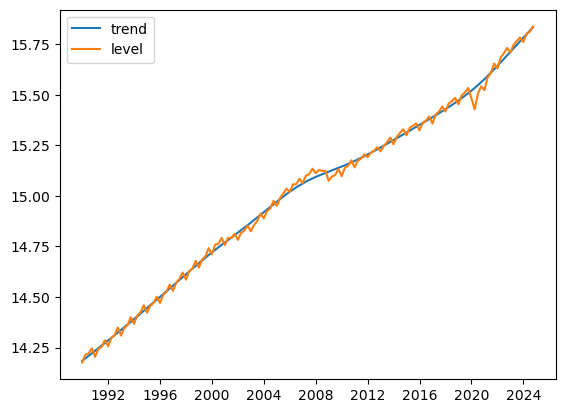

In [7]:
plt.plot(trend, label='trend')
plt.plot(y, label='level')
plt.legend()
plt.show()

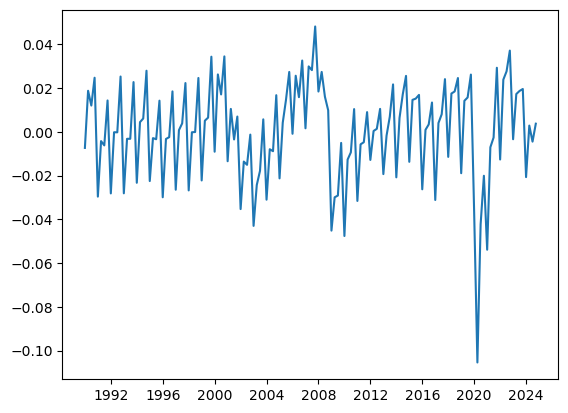

In [8]:
plt.plot(cycle)
plt.show()

In [16]:
stl = STL(y, seasonal=9)
res = stl.fit()

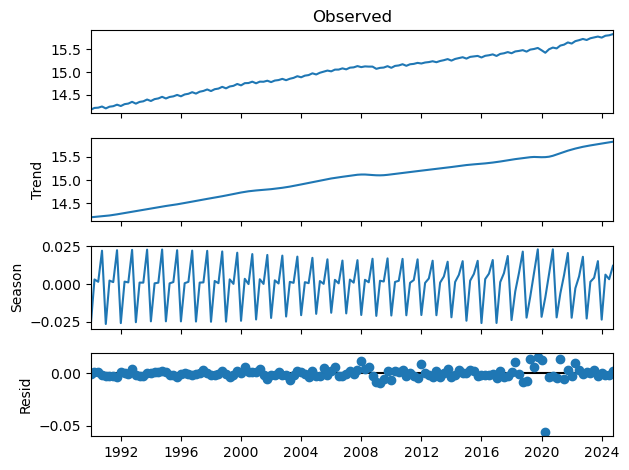

In [17]:
res.plot()
plt.show()

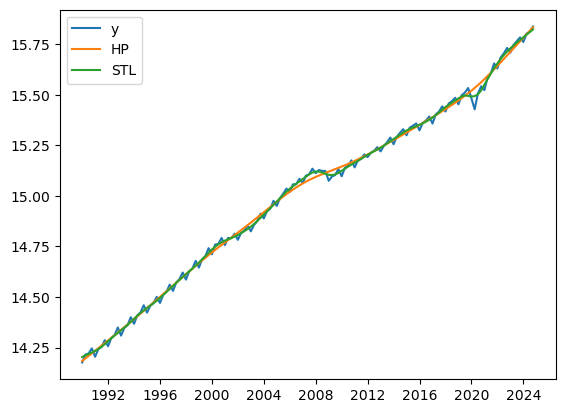

In [18]:
plt.plot(y, label='y')
plt.plot(trend, label='HP')
plt.plot(res.trend, label='STL')
plt.legend()
plt.show()

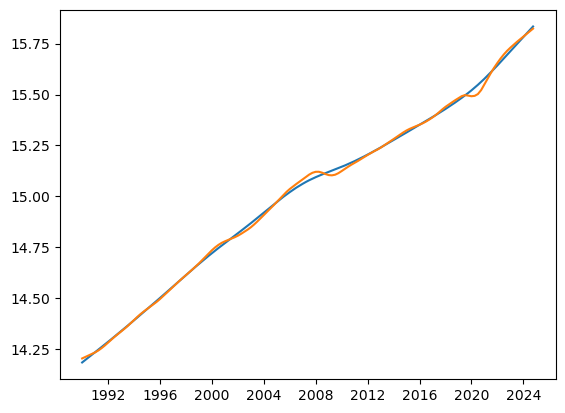

In [19]:
plt.plot(trend, label='HP')
plt.plot(res.trend, label='STL')
plt.show()